In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [182]:
ld = pd.read_csv("loan_train.csv")

In [183]:
ld.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [184]:
ld.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [185]:
col = (['Gender', 'Married', 'Education', 'Self_Employed', 
        'Property_Area', 'Loan_Status'])

In [186]:
ld.shape

(614, 13)

In [187]:
ld.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [188]:
ld.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [189]:
# we are using mode for categorical

ld["Gender"] = ld["Gender"].fillna(ld["Gender"].mode()[0])

In [190]:
ld["Married"] = ld["Married"].fillna(ld["Married"].mode()[0])
ld["Dependents"] = ld["Dependents"].fillna(ld["Dependents"].mode()[0])
ld["Self_Employed"] = ld["Self_Employed"].fillna(ld["Self_Employed"].mode()[0])
ld["Credit_History"] = ld["Credit_History"].fillna(ld["Credit_History"].mode()[0])

In [191]:
ld["Gender"].shape

(614,)

In [192]:
ld["LoanAmount"] = ld["LoanAmount"].fillna(ld["LoanAmount"].mean())

In [193]:
ld["Loan_Amount_Term"] = ld["Loan_Amount_Term"].fillna(ld["Loan_Amount_Term"].mean())


In [194]:
ld["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [195]:
ld.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [196]:
# label encoding

ld.replace({"Loan_Status":{"Y": 1, "N": 0}}, inplace=True)

In [197]:
ld["Loan_Status"].unique()

array([1, 0], dtype=int64)

In [198]:
ld["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [199]:
# replacing 3+ to 3

ld = ld.replace(to_replace="3+", value=3)

In [200]:
ld["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [201]:
ld.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


<AxesSubplot:xlabel='Education', ylabel='count'>

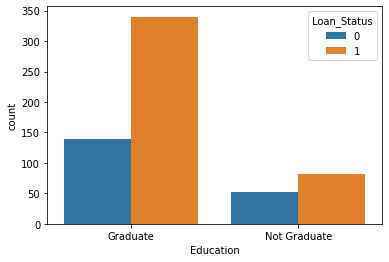

In [202]:
# Data Visualization

    # countplot is for category
    
sns.countplot(x="Education", hue="Loan_Status", data=ld)

In [203]:
# covert text columns to numerical

col = (['Gender', 'Married', 'Education', 'Self_Employed', 
        'Property_Area', 'Loan_Status'])

In [204]:
ld["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [205]:
ld.replace({"Gender": {"Male":1, "Female":0}, "Married": {"Yes":1, "No":0},
           "Education": {"Graduate": 1, "Not Graduate": 0},
           "Self_Employed": {"Yes": 1, "No": 0},
           "Property_Area": {"Rural": 0,  "Semiurban": 1, "Urban": 2}}, inplace=True)

In [206]:
ld.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [207]:
ld.shape

(614, 13)

In [208]:
# separating data and target

X = ld.drop(columns=["Loan_ID", "Loan_Status"], axis=1)
y = ld["Loan_Status"]

In [209]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2


In [210]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [211]:
# Train_Test_Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=0)

In [212]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


In [213]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()

In [214]:
model1.fit(X_train, y_train)

GaussianNB()

In [215]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100)

In [216]:
model2.fit(X_train, y_train)

RandomForestClassifier()

In [217]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()

In [218]:
model3.fit(X_train, y_train)

LogisticRegression()

In [219]:
# Accuracy score on train data :

X_train_pred1 = model1.predict(X_train)
X_train_pred2 = model2.predict(X_train)
X_train_pred3 = model3.predict(X_train)

In [220]:
print(f"Accuracy of GaussianNB: ", accuracy_score(y_train, X_train_pred1))
print(f"Accuracy of RandomForestClassifier: ", accuracy_score(y_train, X_train_pred2))
print(f"Accuracy of LogisticRegression: ", accuracy_score(y_train, X_train_pred3))

Accuracy of GaussianNB:  0.7952898550724637
Accuracy of RandomForestClassifier:  1.0
Accuracy of LogisticRegression:  0.8079710144927537


In [221]:
# Seems like Random Forest is doing Over Fitting
    # So we will choose other two models

In [222]:
# Let's check accuracy on test data

X_test_pred1 = model1.predict(X_test)
#X_test_pred2 = model2.predict(X_test)
X_test_pred3 = model3.predict(X_test)

In [223]:
print(f"Accuracy of GaussianNB: ", accuracy_score(y_test, X_test_pred1))
#print(f"Accuracy of RandomForestClassifier: ", accuracy_score(y_test, X_test_pred2))
print(f"Accuracy of LogisticRegression: ", accuracy_score(y_test, X_test_pred3))

Accuracy of GaussianNB:  0.8225806451612904
Accuracy of LogisticRegression:  0.8387096774193549


In [224]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
268,0,0,0,1,0,3418,0.0,135.0,360.0,1.0,0
505,1,1,2,1,0,3510,4416.0,243.0,360.0,1.0,0
337,1,1,2,1,1,2500,4600.0,176.0,360.0,1.0,0
446,1,1,2,0,0,4652,0.0,110.0,360.0,1.0,0
425,1,1,0,1,0,2666,4300.0,121.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
444,1,1,0,1,0,7333,8333.0,175.0,300.0,1.0,0
316,1,1,2,1,0,3717,0.0,120.0,360.0,1.0,1
280,1,0,1,0,1,4053,2426.0,158.0,360.0,0.0,2
227,1,1,2,1,0,6250,1695.0,210.0,360.0,1.0,1


In [225]:
y_test

268    0
505    1
337    1
446    1
425    1
      ..
444    1
316    1
280    0
227    1
111    1
Name: Loan_Status, Length: 62, dtype: int64

In [226]:
## Making a predictive system

input_data = (1,1,2,0,0,4652,0.0,110.0,360.0,1.0,0)
input_data_as_np_array = np.asarray(input_data)

input_data_reshaped = input_data_as_np_array.reshape(1, -1)

prediction1 = model1.predict(input_data_reshaped)
prediction3 = model3.predict(input_data_reshaped)

if (prediction1==1):
    print("Loan1 Approved.")
elif (prediction1==0):
    print("Loan1 not approved.")
    
if (prediction3==1):
    print("Loan3 Approved.")
elif (prediction3==0):
    print("Loan3 not approved.")

Loan1 Approved.
Loan3 Approved.


D:\ProgramData\Programs\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
D:\ProgramData\Programs\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [227]:
import pickle

In [228]:
file = open("modelNB.pkl", "wb")
pickle.dump(model1, file)

In [229]:
file2 = open("modelLR.pkl", "wb")
pickle.dump(model3, file2)